In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    classification_report, roc_auc_score, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, auc, precision_recall_curve


os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Read the data

In [2]:
# Define the data types as a dictionary
dtypes = {
    'census_tract': 'float32',
    'action_taken': 'int32',
    'loan_type': 'int32',
    'lien_status': 'int32',
    'reverse_mortgage': 'int32',
    'open_end_line_of_credit': 'int32',
    'loan_amount': 'int32',
    'combined_loan_to_value_ratio': 'int32',
    'interest_rate': 'float32',
    'total_loan_costs': 'int32',
    'origination_charges': 'int32',
    'loan_term': 'int32',
    'negative_amortization': 'int32',
    'interest_only_payment': 'int32',
    'balloon_payment': 'int32',
    'other_nonamortizing_features': 'int32',
    'property_value': 'float32',
    'occupancy_type': 'int32',
    'manufactured_home_secured_property_type': 'int32',
    'manufactured_home_land_property_interest': 'int32',
    'total_units': 'int32',
    'income': 'float32',
    'debt_to_income_ratio': 'int32',
    'applicant_credit_score_type': 'int32',
    'co_applicant_credit_score_type': 'int32',
    'applicant_sex': 'int32',
    'co_applicant_sex': 'int32',
    'applicant_age': 'int32',
    'co_applicant_age': 'int32',
    'aus_1': 'int32',
    'applicant_race_1': 'float32',
    'applicant_race_2': 'float32',
    'co_applicant_race_1': 'float32',
    'co_applicant_race_2': 'float32',
    'applicant_ethnicity_1': 'float32',
    'co_applicant_ethnicity_1': 'float32'
}

In [3]:
# Read the CSV file with specified data types
df = pd.read_csv('final_dataset.csv', dtype=dtypes, low_memory=False)

In [4]:
X = df.drop('action_taken', axis=1)
y = df['action_taken']

In [5]:
correlation_matrix = df.corr()

In [6]:
correlation_matrix

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
census_tract,1.000000,0.013724,0.021427,0.005715,NaN,0.003166,-0.162781,-0.055863,0.043115,0.000067,...,0.018515,-0.037813,0.009116,-0.048391,-0.012495,-0.005040,-0.006999,-0.003911,0.053474,0.045278
action_taken,0.013724,1.000000,0.011502,0.044558,NaN,-0.034270,-0.097737,0.102058,-0.186579,-0.129834,...,0.121087,0.084320,0.141446,0.585696,-0.128596,-0.013217,-0.049226,-0.006216,-0.091525,-0.035521
loan_type,0.021427,0.011502,1.000000,-0.020707,NaN,0.009378,-0.085059,0.001637,0.001028,0.155589,...,0.038510,0.013493,0.036933,-0.042105,-0.032758,-0.002445,-0.011541,-0.001471,0.002948,-0.004810
lien_status,0.005715,0.044558,-0.020707,1.000000,NaN,-0.358394,-0.064013,0.078813,0.031669,-0.010075,...,0.005041,-0.013343,0.004468,0.094059,-0.021798,0.002955,-0.008190,0.001297,-0.036881,-0.020115
reverse_mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_end_line_of_credit,0.003166,-0.034270,0.009378,-0.358394,NaN,1.000000,0.022402,0.001364,0.006394,0.004449,...,-0.011441,-0.000148,-0.008833,-0.037293,0.007214,-0.001208,0.001693,-0.000530,0.020475,0.000169
loan_amount,-0.162781,-0.097737,-0.085059,-0.064013,NaN,0.022402,1.000000,-0.058693,-0.244461,0.112338,...,-0.119277,-0.067954,-0.154420,0.169007,0.098234,0.010359,0.031958,-0.000663,0.097043,0.034541
combined_loan_to_value_ratio,-0.055863,0.102058,0.001637,0.078813,NaN,0.001364,-0.058693,1.000000,-0.063047,-0.065843,...,0.030439,0.162841,0.077201,0.068726,-0.007321,-0.000746,0.003367,0.000626,-0.033507,-0.014813
interest_rate,0.043115,-0.186579,0.001028,0.031669,NaN,0.006394,-0.244461,-0.063047,1.000000,-0.073408,...,0.035880,0.032778,0.056295,-0.339400,-0.016761,-0.001194,-0.009349,-0.001471,-0.040928,-0.023244
total_loan_costs,0.000067,-0.129834,0.155589,-0.010075,NaN,0.004449,0.112338,-0.065843,-0.073408,1.000000,...,-0.022885,-0.062172,-0.044570,0.015468,0.016223,0.001897,0.002541,-0.000402,0.012381,0.002942


## Make the data fair and then Split the data

In [7]:
# Define the minority classes for each column
minority_classes = {
    'applicant_sex': [2, 3, 6, 4],
    'co_applicant_sex': [2, 1, 6],
    'applicant_race_1': [3.0],
    'co_applicant_race_1': [3.0],
    'applicant_race_2': [3.0],
    'co_applicant_race_2': [3.0],
    'applicant_ethnicity_1': [1.0],
    'co_applicant_ethnicity_1': [1.0],
}

# Create a dictionary to store resampled datasets for each column
resampled_datasets = {}

# Iterate through the columns and apply SMOTE to each
for column, minority_class in minority_classes.items():
    # Select the specific column
    selected_column = df[column].values.reshape(-1, 1)

    # Define y_min based on the minority class for this column
    y_min = [1 if value in minority_class else 0 for value in df[column]]

    # Apply SMOTE to the selected column
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(selected_column, y_min)

    # Store the resampled data in the dictionary
    resampled_datasets[column] = (X_resampled, y_resampled)


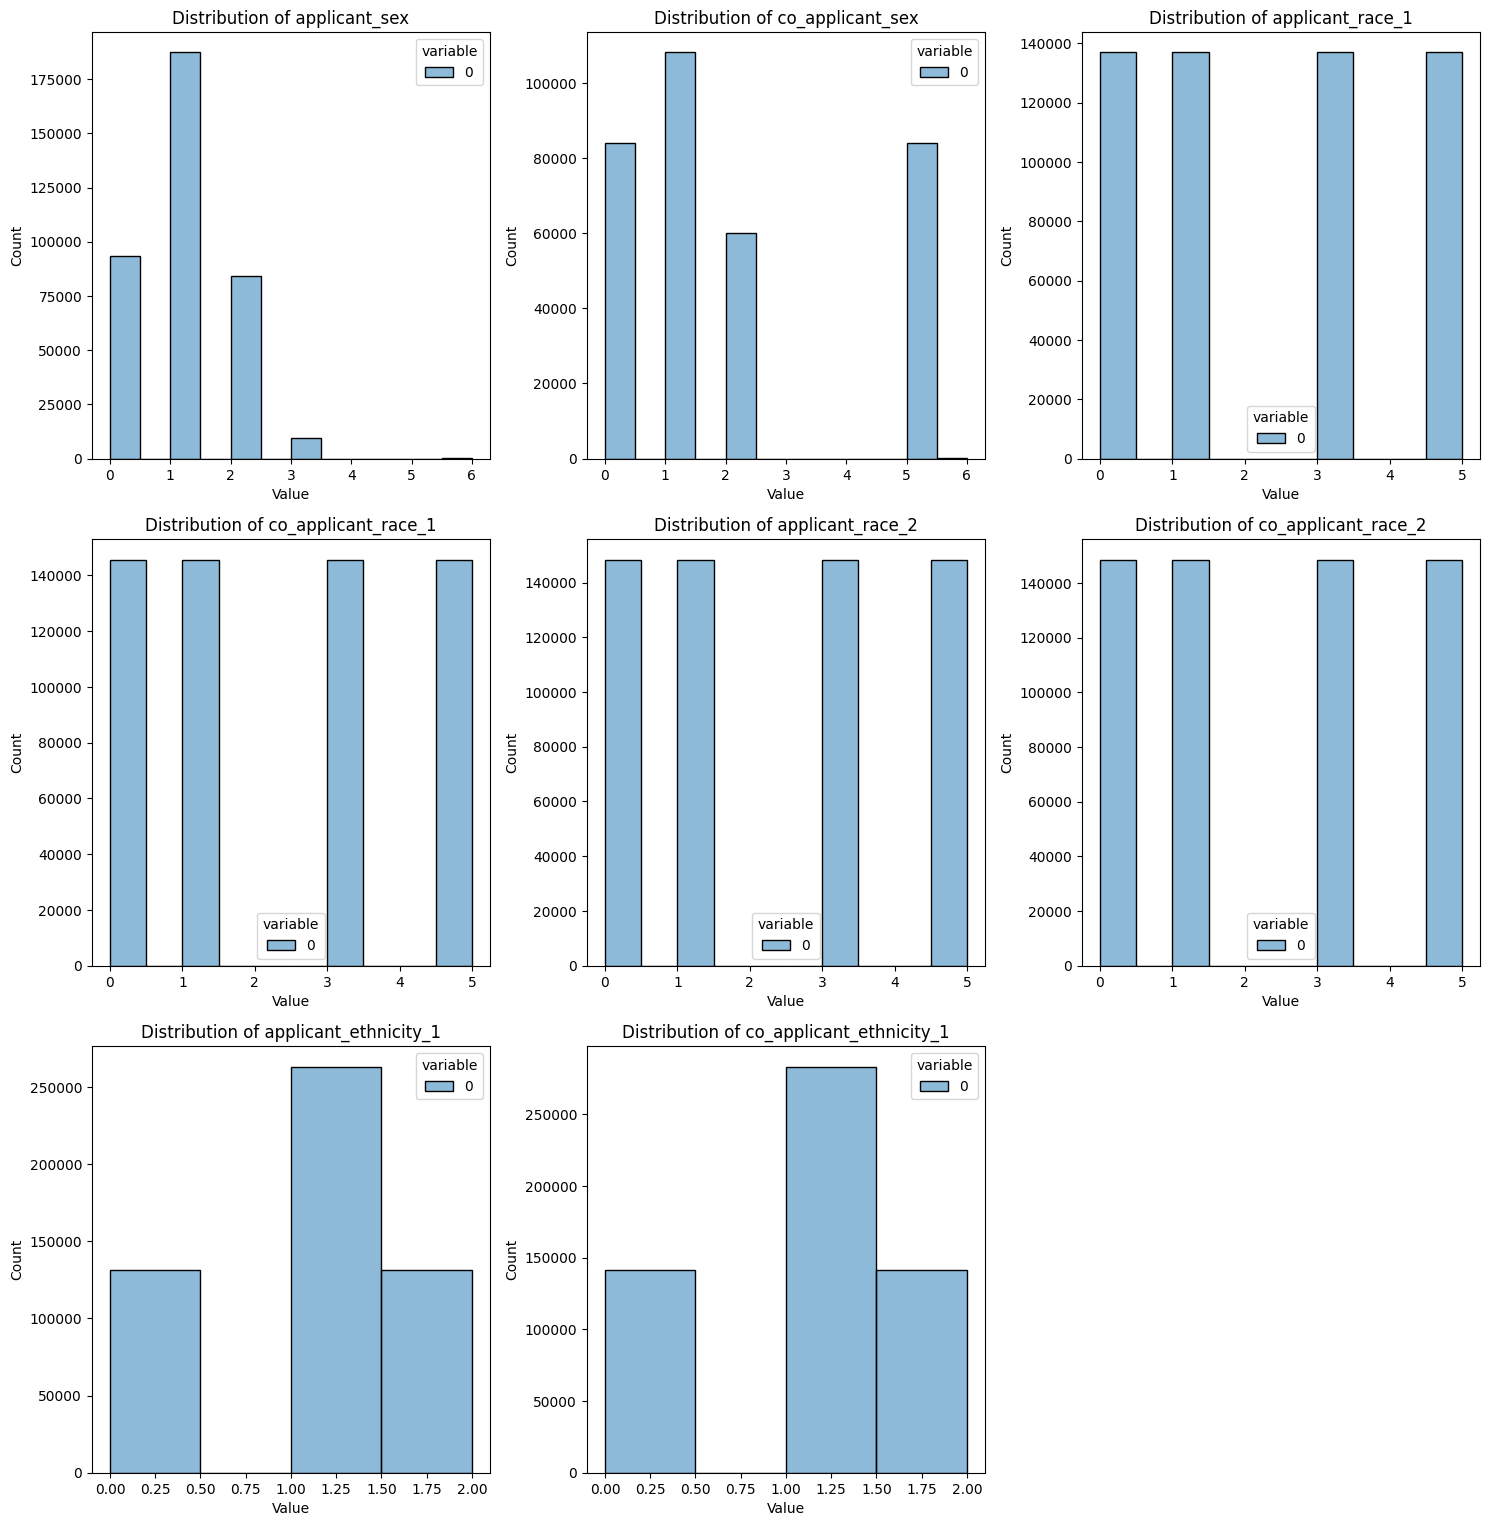

In [8]:
# Create a grid of histograms with 3 plots on every row
columns_to_plot = list(resampled_datasets.keys())

num_plots = len(columns_to_plot)
num_rows = (num_plots // 3) + (num_plots % 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    X_resampled, y_resampled = resampled_datasets[column]

    merged_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

    g = sns.histplot(data=merged_data.melt(), x='value', hue='variable', binwidth=0.5, ax=axes[i])
    g.set_title(f'Distribution of {column}')
    g.set_xlabel("Value")
    g.set_ylabel("Count")

# Hide any empty subplots
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [9]:
X_resampled.shape

(283310, 1)

In [10]:
# Convert the list to a NumPy array
y_resampled = np.array(y_resampled)

# Now you can access the shape
print(y_resampled.shape)

(283310,)


# SMOTE-ENN Gridsearch

In [13]:
'''

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Create an instance of SimpleImputer to impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values in merged_data
merged_data_imputed = imputer.fit_transform(merged_data)

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Extract the feature data (X_resampled) and labels (y_resampled) from merged_data_imputed
X_resampled = merged_data_imputed[:, :-1]  # Exclude the last column which is 'action_taken'
y_resampled = merged_data_imputed[:, -1]

# Apply SMOTE to both the imputed feature data and labels
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)




'''

In [14]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a SMOTE-ENN instance
smote_enn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

# Define a parameter grid for random search
param_dist = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'max_iter': [1000, 10000, 100000]  # Maximum number of iterations
}

# Create a logistic regression model
logistic_reg_smote = LogisticRegression(solver='saga', max_iter=1000)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(logistic_reg_smote, param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42, verbose=1)

# Fit the RandomizedSearchCV object on your resampled training data
random_search.fit(X_resampled, y_resampled)

# Access the best hyperparameters and the best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Make predictions on the test set
y_prob = best_estimator.predict_proba(X_test)[:, 1]

# Calculate and print the classification report
report = classification_report(y_test, (y_prob > 0.5).astype(int), zero_division=1)
print(report)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28232
         1.0       1.00      1.00      1.00     28430

    accuracy                           1.00     56662
   macro avg       1.00      1.00      1.00     56662
weighted avg       1.00      1.00      1.00     56662

AUC-ROC: 1.0
Precision-Recall AUC: 1.0


In [ ]:
# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC-ROC
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Final model (based on Gridsearch result)

In [ ]:
# Create the logistic regression model with the best hyperparameters
best_logistic_reg = LogisticRegression(C=10, max_iter=1000, penalty='l2')

# Fit the model on your training data
best_logistic_reg.fit(X_train, y_train)

# Make predictions on your test data
y_prob_best = best_logistic_reg.predict_proba(X_test)[:, 1]

# Calculate and print the AUC-ROC score using the best model
roc_auc_best = roc_auc_score(y_test, y_prob_best)
print("Best AUC-ROC:", roc_auc_best)

# You can also evaluate other metrics as needed (e.g., precision, recall, F1-score)
